In [2]:
pip install PyOpenGL

Note: you may need to restart the kernel to use updated packages.


In [1]:
#                       Y AND X are inverted

rd=0.01745329
lar=[]
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:

fov=100
ppx=13 #player position in x 
ppy=2 #player position in y
pva=0 #player view angle
GameResolution=[720,1280]
miniMapResolution=[480,854]
MapSize=[16,16]

In [3]:
mp=[[1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 1, 1.,1],
    [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,1],
    [1,0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,1],
    [1,1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,1],
    [1,0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0, 1],
    [1,0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,1],
    [1,1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,1],
    [1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 0, 0.,1  ],
    [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 1, 1.,1]]

mpd=[[1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 1, 1.,1],
    [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,1],
    [1,0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,1],
    [1,1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,1],
    [1,0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0, 1],
    [1,0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,1],
    [1,1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,1],
    [1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 0, 0.  ,1  ],
    [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,1],
    [1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 1, 1.,1]]



WAllTextur=[[1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 1, 1.,1],
            [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,1],
            [1,0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,1],
            [1,1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,1],
            [1,0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,1],
            [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,1],
            [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
            [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
            [1,0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,1],
            [1,0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0, 1],
            [1,0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,1],
            [1,1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,1],
            [1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 0, 0.  ,1],
            [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,1],
            [1,0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,1],
            [1,1., 1., 1., 1., 1., 1., 1., 1., 1, 1., 1., 1., 1, 1.,1]]

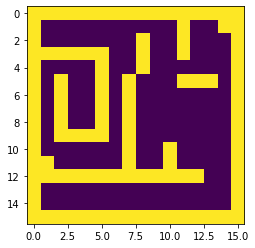

In [4]:
plt.imshow(mp)


# ##############
# 3D Renderer:   
# ##############


In [5]:
#########################################################################################################
###################################### THE 3D RENDERER ##################################################
#########################################################################################################


def threDRenderer(posi,posy,pva,frame):
    
    RayDiff=fov/GameResolution[1]
    
    initialColm=0
    
    colLen=1
    
    
    
    #print(colLen)
    #####################################
    
    ######################################
    
    nextCol=initialColm+colLen
    a=pva+fov/2
    while(a>pva-fov/2):
    
        
        lar=lineTracer(posi,posy,0,a,1)
        #(posi,posy,dist,pva,Wmode)
        p=((posi-lar[-1][0])**2 + (posy-lar[-1][1])**2)**0.5 ##Finding distance to that intercection
        #print("P: ",p)
    #####################################
        if p==0:
            
            wallHeight=0
            
        else:
            
            wallHeight=int((GameResolution[0])/(p/30))
            
        #print("wallHeight",wallHeight)
    #####################################    
        ofset=(GameResolution[0]/2)
        rngi=ofset-wallHeight/2
        rngy=ofset+wallHeight/2
        #print("rngi",rngi)
    #####################################  
        #print("rngy",rngy)
    #####################################  
        for i in range(int(initialColm),int(nextCol)):
            for y in range(0,GameResolution[0]):
                if(y>=rngi and y<=rngy):
                    if(lar[-1][2][2]=='x'):
                        frame[y][i][0]=10
                    else:
                        
                        frame[y][i][1]=10
         
                elif(y<rngi):
                    
                    frame[y][i][2]=16
                    
                
                    
        initialColm=nextCol
        nextCol+=colLen
        if(nextCol>GameResolution[1]):
            break
        a+=RayDiff*(-1)    
    return(frame)


405
60


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


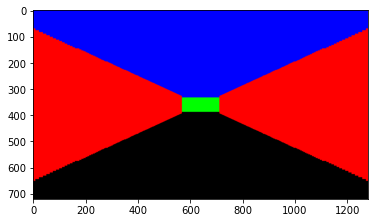

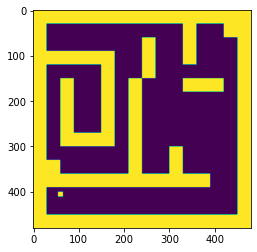

Dir dis ang
d 17 90
New player angle 90


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


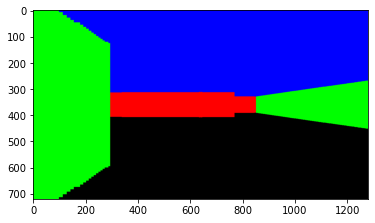

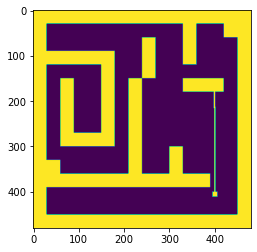

Dir dis ang
w 3 30
New player angle 120


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


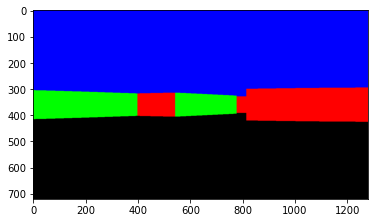

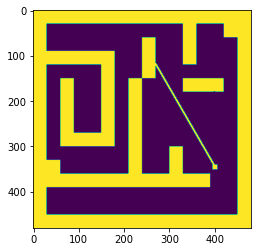

Dir dis ang


KeyboardInterrupt: Interrupted by user

In [6]:
##map upscler code

map_Y_Miltiplier=int(miniMapResolution[0]/MapSize[0]) 
map_X_Miltiplier=int(miniMapResolution[1]/MapSize[1])
#these multiplier no whn multiplies to orignal size of the map gives map in almost 480p Res


#this is where the higher resolution is calculated.
mapy=MapSize[0]*map_Y_Miltiplier    #first using y multiplier 
mapx=MapSize[1]*map_Y_Miltiplier
if(mapx>miniMapResolution[1]):      #thn if the resolution is not corrrect 
    mapy=MapSize[0]*map_X_Miltiplier#we will use x multipler 
    mapx=MapSize[1]*map_X_Miltiplier
    map_Y_Miltiplier=map_X_Miltiplier#the main multipler in all eq will be y multiplier so... put the right multiplier in it 
    
    



#this is the map resolution close to 480p

miniMap=np.zeros([mapy,mapx])
miniMapInfo=np.zeros([mapy,mapx])
i=0
y=0
mmi=0
mmy=0
while True:
    if(mmi<MapSize[0]):
        y=0
        mmy=0
        while True:
            if(mmy<MapSize[1]):
                #print(mmi)
                #print(mmy)
                if(mp[mmi][mmy]==1):
                    for x in range(i,i+map_Y_Miltiplier):
                        for z in range(y,y+map_Y_Miltiplier):
                            miniMap[x][z]=1
                            miniMapInfo[x][z]=1
                y+=map_Y_Miltiplier
                mmy+=1
            else:
                break
    else:
        break
    i+=map_Y_Miltiplier
    mmi+=1
    
                                ##############################
                                ####### GAME AREA :###########
                                ##############################
            
########################################################################################
                                #1. #Game Initialization 
########################################################################################


######################################
    #   INITIALIZING VARIABLES  #
######################################



fov=100
ppx=13.5 #player position in x 
ppy=2 #player position in y
pva=100 #player view angle
playerSize=5
StepSize=20
GameResolution=[720,1280]
miniMapResolution=[480,854]
MapSize=[16,16]
angleLinePAth1=[]
angleLinePAth2=[]
angleLinePAth2=[]

######################################    (Not in working Condition)
    #   INITIALIZING METHODS  #
######################################



##Draws the player and the direction stick ahead of the player 
def DrawPlayer(posi,posy,mapar):#gets player position in x and y cordinates in the frame matrix
    for i in range(posi-playerSize,posi+playerSize+1):
        for y in range(posy-playerSize,posy+playerSize+1):
            mapar[i][y]=1
            
            
            
            
##Removes remains of the player and the direction stick of the player 
def RemPlayer(posi,posy,mapar):#gets player position in x and y cordinates in the frame matrix
    for i in range(posi-playerSize,posi+playerSize+1):
        for y in range(posy-playerSize,posy+playerSize+1):
            mapar[i][y]=0







######################################  
    # LINE FUNCTIONS    #
######################################

def drawLine(thickness,lar,mapvr):
    thickness=int(thickness/2)
    for i in lar:
        for x in range(i[0]-thickness,i[0]+thickness+1):
            for y in range(i[1]-thickness,i[1]+thickness+1):
                mapvr[x][y]=1
    
def remLine(thickness,lar,mapvr):
    thickness=int(thickness/2)
    for i in lar:
        for x in range(i[0]-thickness,i[0]+thickness+1):
            for y in range(i[1]-thickness,i[1]+thickness+1):
                mapvr[x][y]=0
                
def isWall(MpInfo,x,y):
    if(mpInfo[x][y]>=1):
        return(True)
    return(False)
    
    
    
    
def lineTracer(posi,posy,dist,pva,Wmode):
             # (Position of player in y,Position of player in y,distance of the line ,Player View angle ,Wall mode if the line is to be drawn till wall is found)
                
    lineAr=[] # will keep track of all the points of the line 
    if(Wmode==0):
        if(dist==0):
            dist=80
    else:
        dist=1920
    

    
    if(pva==0 or pva==360):
        pva+=0.3
    elif(pva==270 or pva==90):
        pva+=0.3
       
    disy = abs(1/math.tan(rd*pva))
    disx = abs(math.tan(rd*pva))
    #print(disy,disx)
    flg=0
    xadder=0
    yadder=0
    multiplierxa=-1
    multiplierya=1
    if(pva>90 and pva<=180):
        multiplierya=-1
    elif(pva>180 and pva<=270):
        multiplierxa=1
        multiplierya=-1
    elif(pva>270 and pva<=360):
        multiplierxa=1
        multiplierya=1
    
    #################################################
    #Cases to look at
    #1. x>y
    #2. Y<x
    #3  y==x
    #################################################
    #if x is greater than y 
    lineAr.append([posi,posy])
    
    
    
    
    if(disy>disx):
        
        #print("y is bigger")
         
        y=disy #so this for every increase in y there will be y no of x increase 
        #initial y 
        prev_y=0

        noOfSteps=0
        while True:
            prev_y=y
            y+=disy
            
            for x_lp in range(1,(int(y)-int(prev_y))+1):
                yadder+=(1*multiplierya)
                if(miniMapInfo[posi+xadder,posy+yadder]>=1   or noOfSteps==dist):
                    lineAr[-1].append([posi+xadder,posy+yadder,'y'])
                    flg=1
                    break
                
                lineAr.append([posi+xadder,posy+yadder])
                
                noOfSteps+=1
               
            
            xadder+=(1*multiplierxa)
            if(miniMapInfo[posi+xadder,posy+yadder]>=1   or noOfSteps==dist  or flg==1):
                lineAr[-1].append([posi+xadder,posy+yadder,'x'])
                break
            lineAr.append([posi+xadder,posy+yadder])
            noOfSteps+=1
            if(noOfSteps==dist):
                break
                
                
                
    elif(disx>disy):
        #print("x is bigger")
        x=disx #so this for every increase in y there will be y no of x increase 
        #initial y 
        prev_x=0
        
        
        noOfSteps=0
        while True:
            prev_x=x
            x+=disx
            for x_lp in range(1,(int(x)-int(prev_x))+1):
                xadder+=(1*multiplierxa)
                if(miniMapInfo[posi+xadder,posy+yadder]>=1 or noOfSteps==dist):
                    lineAr[-1].append([posi+xadder,posy+yadder,'x'])
                    flg=1
                    break
                
                
                lineAr.append([posi+xadder,posy+yadder])
                noOfSteps+=1
               
            yadder+=(1*multiplierya)
            if(miniMapInfo[posi+xadder,posy+yadder]>=1   or noOfSteps==dist  or flg==1):
                lineAr[-1].append([posi+xadder,posy+yadder,'y'])
                break
            lineAr.append([posi+xadder,posy+yadder])
            noOfSteps+=1
            if(noOfSteps==dist):
                break
    else: ##When both x and y are equal or andle is multiple of 45 something
        #print("they are same")
        noOfSteps=0
        while True:
            step+=1
            xadder+=(1*multiplierxa)
            yadder+=(1*multiplierya)
            if(miniMapInfo[posi+xadder,posy+yadder]>=1 or noOfSteps==dist):
                    lineAr[-1].append([posi+xadder,posy+yadder,'y'])
                    break
            lineAr.append([posi+xadder,posy+yadder])
            
    #print("Ar",lineAr)
    return(lineAr)


###########################
#  Player motion Handeler 
###########################
    ## this moves the player stratigically int the map 
    ## What this function does .
    ## Calculation of new location of the player 
    ## Collision detection.
    ## the movement should be acording to where the player is looking

def MovPlayer(posi,posy,pva,mapar,direction,dis,        na,lar):  ## this is work in progress.  (Changes to the line(pva,dis,na))
                                               #,#new angle(add it to current player angle)
    
    
    
    pva=pva+na
    print("New player angle",pva)
     
    if(pva>360):
        pva-=360
    RemPlayer(posi,posy,mapar)
    remLine(3,lar,mapar)
    
    
    ## Collision detection 
    lar=lineTracer(posi,posy,45,pva,1)
    le=len(lar)## giving the distance that player will move
    if(le-15-1>=0 and le-15 <=dis*StepSize):
        psoi=lar[le-15-1][0]
        psoy=lar[le-15-1][1]
    #tracing a straight line from the player ...... finding sitance from the wall
     
    
    if(direction=='w'):
        posi-=(StepSize*dis)
    elif(direction=='s'):
        posi+=(StepSize*dis)
    elif(direction=='d'):
        posy+=(StepSize*dis)
    elif(direction=='a'):
        posy-=(StepSize*dis)
    DrawPlayer(posi,posy,mapar)
    lar=lineTracer(posi,posy,45,pva,1)
    drawLine(3,lar,mapar)
    return(posi,posy,lar,pva)






ppx=int(ppx*map_Y_Miltiplier)
ppy=int(ppy*map_Y_Miltiplier)
pva=0
lar=[[ppx,ppy]]
print(ppx)
print(ppy)
print
DrawPlayer(ppx,ppy,miniMap)

fov/=2






















########################################################################################
                                #2. GAME LOOP   (ADD A WAY TO CALCUALTE FPS)
########################################################################################
#cv2.namedWindow('Doom Clone',cv2.WINDOW_AUTOSIZE)
while True:
    ##########
    #3d frame
    Frame=np.zeros([GameResolution[0],GameResolution[1],3])
    Frame=threDRenderer(ppx,ppy,pva,Frame)
    plt.imshow(Frame)
    plt.show()
    
    
    
    
    
    ###########
    plt.imshow(miniMap)
    plt.show()
    #cv2.imshow('Doom', miniMap)
    print("Dir dis ang")
    
    #make a try catch block here
    
    direction,dis,ang=input().split()
    if direction=="exit":
        break
    dis=int(dis)
    ang=int(ang)
    ppx,ppy,lar,pva=MovPlayer(ppx,ppy,pva,miniMap,direction,dis,ang,lar)
    #print(ppx)
    #print(ppy)
#cv2.destroyAllWindows()

In [ ]:
cv2.imshow("BEAST ENGINE",Frame)

In [ ]:
import cv2

In [3]:
math.tan(45*rd)

0.999999773205129

In [4]:
abs(-1)

1

In [ ]:
pip insta